## Introducing the question 

* Given Data describing attributes of different customers for Glassdoor, Can we derive any insights regarding the same which would be useful for the  company?

### who benefits from it and what's the benefit

**Glassdoor** through targeting the specific Customers For Monetization

**And Hopefully Customers** after they avail Glassdoor Services

### Reason for Choosing This Task
* I wanted to simulate the situation that would occur once I start the Data Scientist Job.

### Description Of Data

**employerId** 

* Uniquely identifiable key for each employer, anonymized and randomized for legal purposes.

**employeesTotalNum** 
* Number of employees of the employer monthOfSignupPageViews Number of pageviews that the employer profile received

**clicks** 
* Number of clicks the employer profile received industry Industry of the employer

**ATS__c** 
* The name of the applicant tracking system (ATS) used by the employer, or ‘UNKNOWN’ if they do not have one

**timeOnSite**
* Number of days the employer has had an FEA

**hasInterviews** 
* Whether or not the employer has interviews on their profile

**starRating** 
* The employer’s star rating

**numJobs** 
* Number of open jobs the employer has

**subsidiary** 
* Whether the employer is a subsidiary of a parent company

**awards** 
* Number of awards the employer has won
**contentCount**
* Number of reviews and interviews an employer has

**freshContent**
* Number of reviews and interviews in the past 3 months

**followers**
* Number of followers the employer has

**photos**
* Number of photos the employer has

**intDifficulty**
* Average difficulty of the employer’s interviews (ranges from 1-5)

**intDuration** 
* Average number of days the employer’s interviews take

**basePayAmount** 
* Average salary based on reviews

**respondedContacts** 
* Number of contacts linked to the account that responded

**isWon** 
* Indicates whether an account has converted to a paying client.

### Challenge

* To build a model for predicting Potential Paying Clients in Future.

## Let's Get Started

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
glassdoor_data=pd.read_csv("data_challenge_traindata.csv")

## Know about the data through descriptive analysis:
Functions/Attributes used:
* head:to know few samples of data
* columns:to specify the columns in data
* info:to know about characteristics of each column
* describe: to know about the stats of each column

In [3]:
glassdoor_data.head()

,Unnamed: 0,ATS__c,Industry,numJobs,awards,contentCount,followers,freshContent,photos,starRating,...,timeOnSite,intDifficulty,intDuration,has_interviews,basePayAmount,subsidiary,employeesTotalNum,RespondedContacts,employerId,isWon
0,0,CustomCrawl,Manufacturing,39.0,0.0,24.0,56.0,2.0,0.0,3.111111,...,0,2.5,33.0,1,53558.0,0,760.0,NaN,EKETL,False
1,1,other,Advertising & Marketing,1.0,0.0,24.0,30.0,0.0,0.0,4.400000,...,582,2.7,11.0,1,57150.0,0,25.0,2.0,oKs80,False
2,2,greenhouse,Retail,45.0,30.0,314.0,704.0,40.0,38.0,3.008850,...,902,2.4,11.0,1,74585.0,0,350.0,8.0,TCfko,False
3,3,UNKNOWN,Business Services,0.0,0.0,2.0,6.0,0.0,0.0,4.000000,...,0,NaN,NaN,0,44733.0,0,400.0,NaN,1XXgK,False
4,4,UNKNOWN,NaN,0.0,0.0,6.0,14.0,0.0,0.0,3.000000,...,0,NaN,NaN,0,38285.0,0,40.0,NaN,ZKTxw,False


In [4]:
glassdoor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16901 entries, 0 to 16900
Data columns (total 22 columns):
Unnamed: 0                16901 non-null int64
ATS__c                    16897 non-null object
Industry                  16299 non-null object
numJobs                   16901 non-null float64
awards                    13609 non-null float64
contentCount              13609 non-null float64
followers                 13609 non-null float64
freshContent              13609 non-null float64
photos                    13609 non-null float64
starRating                12945 non-null float64
clicks                    10864 non-null float64
monthOfSignupPageViews    12193 non-null float64
timeOnSite                16901 non-null int64
intDifficulty             14062 non-null float64
intDuration               13752 non-null float64
has_interviews            16901 non-null int64
basePayAmount             16901 non-null float64
subsidiary                16901 non-null int64
employeesTotalNum  

**Need to Convert the object data type Variables to String as pandas does not do it by default anymore**

In [5]:
glassdoor_data["ATS__c"]=glassdoor_data.ATS__c.astype(str).copy()
glassdoor_data["Industry"]=glassdoor_data.ATS__c.astype(str).copy()
glassdoor_data["employerId"]=glassdoor_data.ATS__c.astype(str).copy()
glassdoor_data["isWon"]=glassdoor_data.isWon.astype(int).copy()
glassdoor_data.describe()

,Unnamed: 0,numJobs,awards,contentCount,followers,freshContent,photos,starRating,clicks,monthOfSignupPageViews,timeOnSite,intDifficulty,intDuration,has_interviews,basePayAmount,subsidiary,employeesTotalNum,RespondedContacts,isWon
count,16901.000000,16901.000000,13609.000000,13609.000000,13609.000000,13609.000000,13609.000000,12945.000000,10864.000000,12193.000000,16901.000000,14062.000000,13752.000000,16901.000000,1.690100e+04,16901.000000,1.672900e+04,14227.000000,16901.000000
mean,8450.000000,66.693983,2.211478,149.650231,644.424572,16.384598,8.342273,3.367642,613.310751,2675.538096,398.939885,2.621483,18.362784,0.813680,9.223800e+04,0.075498,3.661626e+03,5.378295,0.109165
std,4879.042785,623.519998,6.655477,859.193170,7974.777471,73.074426,22.428202,0.821787,2405.744225,12248.281479,390.476990,0.609746,16.532326,0.389376,9.493495e+05,0.264202,2.387338e+04,13.542732,0.311856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-396.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000
25%,4225.000000,0.000000,0.000000,12.000000,32.000000,2.000000,0.000000,2.833333,43.000000,244.000000,41.000000,2.300000,8.000000,1.000000,3.830500e+04,0.000000,1.250000e+02,1.000000,0.000000
50%,8450.000000,6.000000,0.000000,32.000000,82.000000,4.000000,0.000000,3.307692,137.000000,655.000000,300.000000,2.700000,14.000000,1.000000,5.501600e+04,0.000000,3.500000e+02,3.000000,0.000000
75%,12675.000000,25.000000,2.000000,84.000000,234.000000,12.000000,10.000000,3.915509,402.000000,1781.000000,701.000000,3.000000,23.000000,1.000000,7.610700e+04,0.000000,1.300000e+03,5.000000,0.000000
max,16900.000000,47741.000000,144.000000,38826.000000,600948.000000,3060.000000,1196.000000,5.000000,76667.000000,726540.000000,1700.000000,5.000000,365.000000,1.000000,9.600000e+07,1.000000,1.900000e+06,780.000000,1.000000


**Drop Unnecessary Data**

* We are dropping the columns employedId and Unnamed.
* The reason for dropping "Unnamed" is that it is an extra index on the dataframe
* The reason for dropping "employedId" is that it is just a number given to identify each entity and it's value does not correspond to anything tangible.

In [6]:
glassdoor_data=glassdoor_data.drop(columns=["Unnamed: 0"])

In [7]:
glassdoor_data.head()

,ATS__c,Industry,numJobs,awards,contentCount,followers,freshContent,photos,starRating,clicks,...,timeOnSite,intDifficulty,intDuration,has_interviews,basePayAmount,subsidiary,employeesTotalNum,RespondedContacts,employerId,isWon
0,CustomCrawl,CustomCrawl,39.0,0.0,24.0,56.0,2.0,0.0,3.111111,133.0,...,0,2.5,33.0,1,53558.0,0,760.0,NaN,CustomCrawl,0
1,other,other,1.0,0.0,24.0,30.0,0.0,0.0,4.400000,1.0,...,582,2.7,11.0,1,57150.0,0,25.0,2.0,other,0
2,greenhouse,greenhouse,45.0,30.0,314.0,704.0,40.0,38.0,3.008850,665.0,...,902,2.4,11.0,1,74585.0,0,350.0,8.0,greenhouse,0
3,UNKNOWN,UNKNOWN,0.0,0.0,2.0,6.0,0.0,0.0,4.000000,27.0,...,0,NaN,NaN,0,44733.0,0,400.0,NaN,UNKNOWN,0
4,UNKNOWN,UNKNOWN,0.0,0.0,6.0,14.0,0.0,0.0,3.000000,NaN,...,0,NaN,NaN,0,38285.0,0,40.0,NaN,UNKNOWN,0


In [8]:
glassdoor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16901 entries, 0 to 16900
Data columns (total 21 columns):
ATS__c                    16901 non-null object
Industry                  16901 non-null object
numJobs                   16901 non-null float64
awards                    13609 non-null float64
contentCount              13609 non-null float64
followers                 13609 non-null float64
freshContent              13609 non-null float64
photos                    13609 non-null float64
starRating                12945 non-null float64
clicks                    10864 non-null float64
monthOfSignupPageViews    12193 non-null float64
timeOnSite                16901 non-null int64
intDifficulty             14062 non-null float64
intDuration               13752 non-null float64
has_interviews            16901 non-null int64
basePayAmount             16901 non-null float64
subsidiary                16901 non-null int64
employeesTotalNum         16729 non-null float64
RespondedContacts

In [9]:
glassdoor_data.columns

Index(['ATS__c', 'Industry', 'numJobs', 'awards', 'contentCount', 'followers',
       'freshContent', 'photos', 'starRating', 'clicks',
       'monthOfSignupPageViews', 'timeOnSite', 'intDifficulty', 'intDuration',
       'has_interviews', 'basePayAmount', 'subsidiary', 'employeesTotalNum',
       'RespondedContacts', 'employerId', 'isWon'],
      dtype='object')

## Visualizations

* Let's look at how frequency distribution of the data

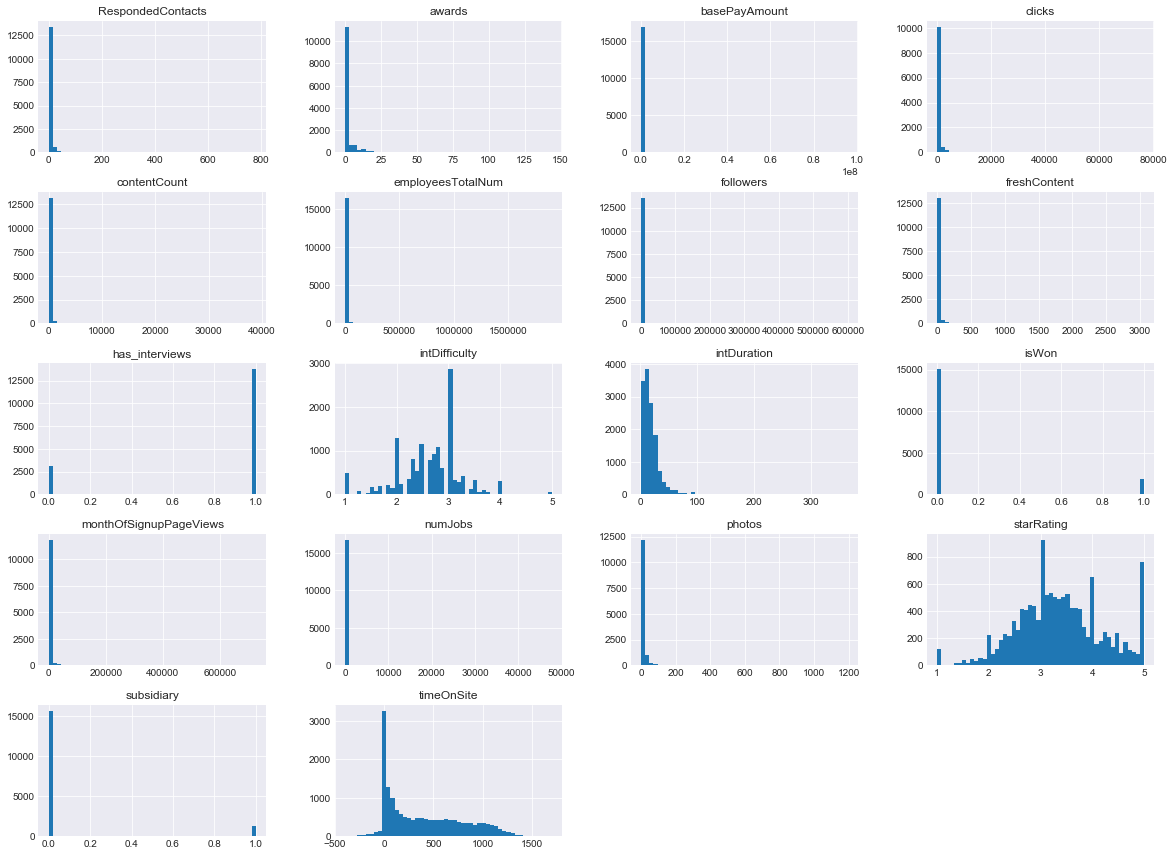

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
#Used to plot the histogram of the dataframe numerical features to know the overall distribution.
#This can also show whether if there was any scaling/normalization done on the features on close observation.
glassdoor_data.hist(bins=50,figsize=(20,15))
plt.show()

** Stratified Sampling:** 
* The population is divided into homogenuous sub groups called strata and the right number of sample from each sub group is selected in way so that it is representative of the overall population. 

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(glassdoor_data,glassdoor_data["isWon"]):
    glassdoor_data_train=glassdoor_data.loc[train_index]
    glassdoor_data_test=glassdoor_data.loc[test_index]

**Verifying Stratified Sampling**

In [12]:
glassdoor_data["isWon"].value_counts()/len(glassdoor_data)

0    0.890835
1    0.109165
Name: isWon, dtype: float64

## Resampling the Data to Tackle Imbalanced Classes

* Let's resample the data to upsample the class(0) with lesser instances to equal the class(1) with higher number of instances.

In [13]:
import numpy as np

from sklearn.utils import resample

glassdoor_data_train = glassdoor_data_train[np.isfinite(glassdoor_data_train['isWon'])]

glassdoor_data_0=glassdoor_data_train[glassdoor_data.isWon==0]
glassdoor_data_1=glassdoor_data_train[glassdoor_data.isWon==1]
glassdoor_data_1_upsampled=resample(glassdoor_data_1,replace=True,n_samples=len(glassdoor_data_0),random_state=42)
glassdoor_data_train=pd.concat([glassdoor_data_1_upsampled,glassdoor_data_0]).copy()

glassdoor_data_train["isWon"].value_counts()/len(glassdoor_data_train)

1    0.5
0    0.5
Name: isWon, dtype: float64

In [14]:
glassdoor_data_test = glassdoor_data_test[np.isfinite(glassdoor_data_test['isWon'])]
glassdoor_data_test["isWon"].value_counts()/len(glassdoor_data_test)

0    0.890861
1    0.109139
Name: isWon, dtype: float64

**Finding the Correlation with the target variable**

In [15]:
corr_matrix=glassdoor_data_train.corr()
corr_matrix["isWon"].sort_values(ascending=False)

isWon                     1.000000
has_interviews            0.126867
subsidiary                0.085904
monthOfSignupPageViews    0.083153
clicks                    0.056711
RespondedContacts         0.054802
freshContent              0.054323
timeOnSite                0.051968
contentCount              0.037921
photos                    0.031255
numJobs                   0.029002
intDifficulty             0.027507
followers                 0.021137
employeesTotalNum         0.019447
basePayAmount             0.015620
awards                    0.008865
intDuration               0.008190
starRating                0.001903
Name: isWon, dtype: float64

### DataPipeline
* Splitting the features into three different types of data namely numerical categorical,non-numerical categorical and quantitative to pass them through different datapipelines.

In [16]:
#Target Variable
target_attrib=["isWon"]

#Numerical Categorical variables 
cat_attrib=['has_interviews','subsidiary']

# Non numeric categorical variables
nonnum_cat_attrib=[]#"ATS__c"]#,"Industry",]

#Quantitative variables
rel_num_attrib=['employeesTotalNum','numJobs','contentCount', 'followers','freshContent', 
                'photos', 'clicks','monthOfSignupPageViews', 'timeOnSite', 'intDifficulty',
                'basePayAmount','RespondedContacts']

** Custom Transformers **
* These transformers need to seamless integrate with sklearn pipeline for better execution of code
* So need to create a class which has three methods: fit(),transform() , fit_transform()
* By adding TransformerMixin as base class we can bypass fit_transform() function
* By adding BaseEstimator as base class we will get two extra methods get_params() and set_params() for tuning hyper parameters

In [17]:
from sklearn.base import BaseEstimator,TransformerMixin
class DataframeSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names,retain=False):
        self.attribute_names=attribute_names
        self.retain=retain
    def fit(self,a=None):
        return self
    def transform(self,dataframe):
        if(self.retain):
            return dataframe[self.attribute_names]
        else:
            return dataframe[self.attribute_names].values

In [18]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import LabelEncoder
class MultiColLabelEncoder(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,y=None):
        return self
    def transform(self,X):
        for attr in list(X):
            X[attr]=LabelEncoder().fit_transform(X[attr])
        return X.values

** Imputer**
* Scikit Learn Class to take care of missing values
* This involves creation of imputer class based on a strategy for instance "median"
* Then we take the current data frame and drop all non numeric values
* Then the imputer instance is fit on this modified data
* Now the statistics_ variable will be array containing the strategy values for each column which can be later used on
  current missing values or otherwise.

** Pipeline **
* Sklearn provides pipeline as a means to apply different estimators/transformers in a serialized manner.
* All but the last one must be transformers i.e they must have fit_transform() method

**Feature Union**
* This helps in getting together the pipelines for categorical attributes and numerical attributes into single entity

In [19]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import CategoricalEncoder

num_pipeline=Pipeline([("selector",DataframeSelector(rel_num_attrib)),
                                ("imputer",Imputer(strategy="median")),
                               ("scaler",StandardScaler()),
                               ])
cat_pipeline=Pipeline([("selector",DataframeSelector(cat_attrib)),
                       ("imputer",Imputer(strategy="most_frequent")),
                        ("encoder",CategoricalEncoder(encoding="onehot-dense"))])

nonum_cat_pipeline=Pipeline([("selector",DataframeSelector(nonnum_cat_attrib,retain=True)),
                       ("multicolencoder",MultiColLabelEncoder()),
                       ("imputer",Imputer(strategy="most_frequent")),
                        ("encoder",CategoricalEncoder(encoding="onehot-dense"))])

full_pipeline=FeatureUnion(transformer_list=[("num_pipeline",num_pipeline),
                                             ("cat_pipeline",cat_pipeline)#,
                                              #("nonum_cat_pipeline",nonum_cat_pipeline)
                                            ])

In [20]:
import numpy as np
glassdoor_data_train_prepared=glassdoor_data_train.copy()
glassdoor_data_train_prepared=full_pipeline.fit_transform(glassdoor_data_train_prepared).copy()
print(glassdoor_data_train_prepared)
glassdoor_data_train_prepared

[[-0.21710804 -0.10946291 -0.10322243 ...  1.          1.
   0.        ]
 [-0.20332976  0.05933431 -0.1434693  ...  1.          1.
   0.        ]
 [-0.21710804 -0.14632668 -0.09051289 ...  1.          1.
   0.        ]
 ...
 [-0.16279103 -0.10170212  0.07894761 ...  1.          1.
   0.        ]
 [-0.20332976 -0.14826687 -0.12864151 ...  0.          1.
   0.        ]
 [-0.21710804 -0.07841975 -0.08839464 ...  1.          1.
   0.        ]]


array([[-0.21710804, -0.10946291, -0.10322243, ...,  1.        ,
         1.        ,  0.        ],
       [-0.20332976,  0.05933431, -0.1434693 , ...,  1.        ,
         1.        ,  0.        ],
       [-0.21710804, -0.14632668, -0.09051289, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.16279103, -0.10170212,  0.07894761, ...,  1.        ,
         1.        ,  0.        ],
       [-0.20332976, -0.14826687, -0.12864151, ...,  0.        ,
         1.        ,  0.        ],
       [-0.21710804, -0.07841975, -0.08839464, ...,  1.        ,
         1.        ,  0.        ]])

In [21]:
np.isnan(glassdoor_data_train_prepared).any()

False

### Preparation Of Input Data

In [22]:
glassdoor_data_test_prepared=glassdoor_data_test.copy()
glassdoor_data_test_prepared=full_pipeline.fit_transform(glassdoor_data_test_prepared).copy()
print(glassdoor_data_test_prepared)
glassdoor_test_labels=glassdoor_data_test[target_attrib].copy()

[[ 0.08812338  0.41360011  0.0947499  ...  1.          0.
   1.        ]
 [-0.09906101 -0.08589801 -0.16627699 ...  1.          1.
   0.        ]
 [ 0.30525728  0.19400299  0.70566392 ...  1.          0.
   1.        ]
 ...
 [-0.06602847 -0.08589801 -0.09130118 ...  1.          1.
   0.        ]
 [-0.09844929 -0.07338211 -0.13850818 ...  1.          1.
   0.        ]
 [-0.10615689 -0.08589801 -0.13017753 ...  0.          1.
   0.        ]]


In [23]:
glassdoor_labels=glassdoor_data_train[target_attrib].copy()
glassdoor_labels[np.isnan(glassdoor_labels)]=0
np.isnan(glassdoor_labels).any()

isWon    False
dtype: bool

### Evaluating different classes of Machine Learning models on basis of accuracy

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#Scoring and Validating Model
from sklearn.model_selection import cross_val_score

#Initializing ML models
lr_clf=LogisticRegression(random_state=42)
gb_clf=GaussianNB()
sgd_clf=SGDClassifier(random_state=42)
rf_clf=RandomForestClassifier(random_state=42)
gb_clf=GradientBoostingClassifier(random_state=42)
knn_clf=KNeighborsClassifier()
sv_clf=SVC(random_state=42)
lsv_clf=LinearSVC(random_state=42)

#Validating ML Models
print("\n LogisticRegression results:")
cross_val_results=cross_val_score(lr_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="accuracy",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)

#Validating ML Models
print("\n GaussianNB results:")
cross_val_results=cross_val_score(gb_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="accuracy",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)

#Validating ML Models
print("\n Stochastic gradient classifier results:")
cross_val_results=cross_val_score(sgd_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="accuracy",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)

print("\n Random Forest classifier results:")
cross_val_results=cross_val_score(rf_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="accuracy",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)


print("\n GradientBoostingClassifier results:")
cross_val_results=cross_val_score(gb_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="accuracy",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)


print("\n K Neighbors classifier results:")
cross_val_results=cross_val_score(knn_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="accuracy",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)


print("\n Support Vector Machine classifier results:")
cross_val_results=cross_val_score(sv_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="accuracy",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)


print("\n Linear Support Vector classifier results:")
cross_val_results=cross_val_score(lsv_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="accuracy",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)


 LogisticRegression results:


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


[0.58468244 0.58219178 0.58758821 0.59111665 0.58326412]
The mean value of Error across cross validation models: 58.57686396114239
The Standard deviation of Error across cross validation models: 0.3229810459013905

 GaussianNB results:


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


[0.75238688 0.74387713 0.73391449 0.73536737 0.73795681]
The mean value of Error across cross validation models: 74.07005360573376
The Standard deviation of Error across cross validation models: 0.6762877317385595

 Stochastic gradient classifier results:
[0.52988792 0.54192611 0.57326692 0.56122873 0.56125415]
The mean value of Error across cross validation models: 55.35127649774034
The Standard deviation of Error across cross validation models: 1.5505324609985793

 Random Forest classifier results:


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished


[0.98733914 0.9833956  0.97654628 0.98381071 0.9798588 ]
The mean value of Error across cross validation models: 98.21901086595255
The Standard deviation of Error across cross validation models: 0.36845586087897114

 GradientBoostingClassifier results:


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.3s finished


[0.75238688 0.74387713 0.73391449 0.73536737 0.73795681]
The mean value of Error across cross validation models: 74.07005360573376
The Standard deviation of Error across cross validation models: 0.6762877317385595

 K Neighbors classifier results:


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s finished


[0.83976754 0.82897468 0.83167289 0.83125778 0.82807309]
The mean value of Error across cross validation models: 83.1949196603545
The Standard deviation of Error across cross validation models: 0.4136491947875172

 Support Vector Machine classifier results:


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


[0.61996679 0.61311748 0.62743877 0.61934413 0.61897841]
The mean value of Error across cross validation models: 61.97691140228573
The Standard deviation of Error across cross validation models: 0.45587901943194026

 Linear Support Vector classifier results:
[0.58634288 0.57866335 0.58821088 0.59028643 0.5801495 ]
The mean value of Error across cross validation models: 58.4730606019233
The Standard deviation of Error across cross validation models: 0.45470211554585593


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.9s finished


### Trying an Ensemble of Best Classifiers

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score,classification_report

ensem_clf=VotingClassifier(estimators=[ ('rf', rf_clf),('gb_clf',gb_clf),('knn_clf',knn_clf)],voting='soft')

print("Ensemble results:")
cross_val_results=cross_val_score(ensem_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="accuracy",verbose=1)
print(cross_val_results)
print(np.mean(cross_val_results)*100)
print(np.std(cross_val_results)*100)

ensem_clf.fit(glassdoor_data_train_prepared,glassdoor_labels)
test_results=ensem_clf.predict(glassdoor_data_test_prepared)
print("accuracy score:",accuracy_score(glassdoor_test_labels,test_results))
print("confusion matrix:",confusion_matrix(glassdoor_test_labels,test_results))
print("classification report:",classification_report(glassdoor_test_labels,test_results))

Ensemble results:


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.3s finished


[0.93441262 0.92839352 0.92424242 0.9275633  0.92815615]
92.85536036651042
0.32887269112399253
accuracy score: 0.8062703342206448
confusion matrix: [[2657  355]
 [ 300   69]]
classification report:              precision    recall  f1-score   support

          0       0.90      0.88      0.89      3012
          1       0.16      0.19      0.17       369

avg / total       0.82      0.81      0.81      3381



### Checking How Time spent on website varies for paying clients compared to other Clients

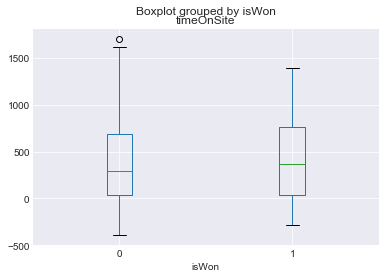

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
glassdoor_data.boxplot(by="isWon",column=["timeOnSite"])

### Evaluating different classes of Machine Learning models on basis of accuracy

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#Scoring and Validating Model
from sklearn.model_selection import cross_val_score

#Initializing ML models
lr_clf=LogisticRegression(random_state=42)
gb_clf=GaussianNB()
sgd_clf=SGDClassifier(random_state=42)
rf_clf=RandomForestClassifier(random_state=42)
gb_clf=GradientBoostingClassifier(random_state=42)
knn_clf=KNeighborsClassifier()
sv_clf=SVC(random_state=42)
lsv_clf=LinearSVC(random_state=42)

#Validating ML Models
print("\n LogisticRegression results:")
cross_val_results=cross_val_score(lr_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="recall",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)

#Validating ML Models
print("\n GaussianNB results:")
cross_val_results=cross_val_score(gb_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="recall",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)

#Validating ML Models
print("\n Stochastic gradient classifier results:")
cross_val_results=cross_val_score(sgd_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="recall",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)


print("\n Random Forest classifier results:")
cross_val_results=cross_val_score(rf_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="recall",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)


print("\n GradientBoostingClassifier results:")
cross_val_results=cross_val_score(gb_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="recall",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)


print("\n K Neighbors classifier results:")
cross_val_results=cross_val_score(knn_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="recall",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)


print("\n Support Vector Machine classifier results:")
cross_val_results=cross_val_score(sv_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="recall",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)

print("\n Linear Support Vector classifier results:")
cross_val_results=cross_val_score(lsv_clf,glassdoor_data_train_prepared,glassdoor_labels,cv=5,scoring="recall",verbose=1)
print(cross_val_results)
print("The mean value of Error across cross validation models:",np.mean(cross_val_results)*100)
print("The Standard deviation of Error across cross validation models:",np.std(cross_val_results)*100)


 LogisticRegression results:


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


[0.6222499  0.63304276 0.64798672 0.61851391 0.64285714]
The mean value of Error across cross validation models: 63.29300836150151
The Standard deviation of Error across cross validation models: 1.137676551567612

 GaussianNB results:


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.7s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


[0.84516397 0.84557908 0.81984226 0.83769199 0.8467608 ]
The mean value of Error across cross validation models: 83.90076181649931
The Standard deviation of Error across cross validation models: 1.0101865480659245

 Stochastic gradient classifier results:
[0.80738896 0.68493151 0.79742632 0.750934   0.3916113 ]
The mean value of Error across cross validation models: 68.6458415217574
The Standard deviation of Error across cross validation models: 15.364395705509937

 Random Forest classifier results:


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


[0.99916978 0.99709423 0.99377335 1.         0.99750831]
The mean value of Error across cross validation models: 99.75091331096428
The Standard deviation of Error across cross validation models: 0.21489712487175833

 GradientBoostingClassifier results:


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished


[0.84516397 0.84557908 0.81984226 0.83769199 0.8467608 ]
The mean value of Error across cross validation models: 83.90076181649931
The Standard deviation of Error across cross validation models: 1.0101865480659245

 K Neighbors classifier results:


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished


[0.97550851 0.97301785 0.96928186 0.9667912  0.97674419]
The mean value of Error across cross validation models: 97.22687209785012
The Standard deviation of Error across cross validation models: 0.3741972550041427

 Support Vector Machine classifier results:


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished


[0.54545455 0.53424658 0.53590702 0.52096306 0.55232558]
The mean value of Error across cross validation models: 53.77793545522122
The Standard deviation of Error across cross validation models: 1.0670289380682696

 Linear Support Vector classifier results:
[0.63636364 0.62764633 0.64840183 0.6222499  0.65448505]
The mean value of Error across cross validation models: 63.782934703610074
The Standard deviation of Error across cross validation models: 1.2147026505156275


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.2s finished


### Trying GridSearchCV on the best performer RandomForestClassifier

In [28]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='recall', return_train_score=True)
grid_search.fit(glassdoor_data_train_prepared,glassdoor_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

### Evaluating the best estimator from the Grid Search performed above

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score
#print(gsearch1.best_estimator_)
test_results=grid_search.best_estimator_.predict(glassdoor_data_test_prepared)
print("accuracy score:",accuracy_score(glassdoor_test_labels,test_results))
print("confusion matrix:",confusion_matrix(glassdoor_test_labels,test_results))
print("classification report:",classification_report(glassdoor_test_labels,test_results))

accuracy score: 0.8322981366459627
confusion matrix: [[2774  238]
 [ 329   40]]
classification report:              precision    recall  f1-score   support

          0       0.89      0.92      0.91      3012
          1       0.14      0.11      0.12       369

avg / total       0.81      0.83      0.82      3381



### Verifying the Hypothesis that the false positives are Relatively new customers compared to Paying Clients

In [30]:
g=np.array(glassdoor_test_labels["isWon"])
established_Clients=[]
potential_Clients=[]#As per Models
for i in range(len(glassdoor_test_labels)):
    if(g[i]==1):
        established_Clients.append(glassdoor_data_test.timeOnSite.iloc[i])
    if(test_results[i]==1):
        potential_Clients.append(glassdoor_data_test.timeOnSite.iloc[i])
print("The mean of the time spend by the Established Paying Clients(days):",np.mean(established_Clients))
print("The mean of the time spend by the Potential Paying Clients(days):",np.mean(potential_Clients))
print("The mean of the time spend by the Potential Paying Clients(days):",np.mean(established_Clients)-np.mean(potential_Clients))

The mean of the time spend by the Established Paying Clients(days): 447.15176151761517
The mean of the time spend by the Potential Paying Clients(days): 359.13309352517985
The mean of the time spend by the Potential Paying Clients(days): 88.01866799243533


### Let's Get Some Work For Sales/Customer Management Team

In [31]:
glassdoor_test_labels_array=np.array(glassdoor_test_labels["isWon"])
potential_Customers=[]
for i in range(len(glassdoor_test_labels)):
    #print(g[i],test_results[i])
    if(glassdoor_test_labels_array[i]==0):
        if(test_results[i]==1):
            if glassdoor_data_test.employerId.iloc[i] not in (["UNKNOWN","CustomCrawl",'EMPLOYER SOURCE',"other"]):
                potential_Customers.append(glassdoor_data_test.employerId.iloc[i])
print("The Potential Customers in Future:")
print(potential_Customers)

The Potential Customers in Future:
['ApplicantPro', 'workDay', 'OpenHire (FTP Feed)', 'ultiRecruit', 'workDay', 'Jobvite', 'WorkforceNow', 'tbe', 'SmartRecruiters', 'workDay', 'taleo', 'iCIMS Master Feed', 'MyStaffingPro', 'OpenHire (FTP Feed)', 'ultiRecruit', 'iCIMS Master Feed', 'icims', 'WorkableHR.com', 'Jobvite', 'MyStaffingPro', 'app.theresumator.com', 'MyStaffingPro', 'iCIMS Master Feed', 'ultiRecruit', 'tbe', 'SmartRecruiters', 'app.theresumator.com', 'app.theresumator.com', 'Jobvite', 'icims', 'iCIMS Master Feed', 'iCIMS Master Feed', 'ultiRecruit', 'greenhouse', 'ultiRecruit', 'ultiRecruit', 'iCIMS Master Feed', 'WorkableHR.com', 'icims', 'workDay', 'app.theresumator.com', 'Jobvite', 'icims', 'ultiRecruit', 'tbe', 'WorkforceNow', 'ultiRecruit', 'Jobvite', 'iCIMS Master Feed', 'greenhouse', 'iCIMS Master Feed', 'ApplicantPro', 'ultiRecruit', 'app.theresumator.com', 'ultiRecruit', 'Jobvite', 'ultiRecruit', 'kenexaBrassRing', 'app.theresumator.com', 'WorkforceNow', 'MyStaffingPr

## Let's Do Something Fancy!!

In [32]:
from keras.models import Sequential

Using TensorFlow backend.


In [33]:
import numpy as np
from keras.datasets import mnist
from keras.layers.core import Dense,Dropout,Activation
from keras.optimizers import SGD
from keras.utils import np_utils

In [34]:
np.random.seed(1671)

In [35]:
glassdoor_data_train_prepared.shape

(24088, 16)

In [36]:
nb_epoch=2500
batch_size=500
verbose=1
nb_classes=1
n_hidden1=30
n_hidden2=15
validation_split=0.2
dropout=0.3
reshaped=16

In [37]:
model=Sequential()
model.add(Dense(n_hidden1,input_shape=(reshaped,)))
model.add(Activation("relu"))
model.add(Dropout(dropout))
model.add(Dense(n_hidden2))
model.add(Activation("relu"))
model.add(Dropout(dropout))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))
model.summary()
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])
history=model.fit(glassdoor_data_train_prepared,glassdoor_labels,batch_size=batch_size,epochs=nb_epoch,verbose=0,validation_split=validation_split)
score=model.evaluate(glassdoor_data_test_prepared,glassdoor_test_labels,verbose=1)
print("Test Score:",score[0])
print("Test accuracy:",score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                510       
_________________________________________________________________
activation_1 (Activation)    (None, 30)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                465       
_________________________________________________________________
activation_2 (Activation)    (None, 15)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
__________

## Future Work:

**Neural Network with Recall as accuracy measure**

**Collection of Data regarding after how many days a Client has converted to paying Client to make targeting more precise.**

**On a lighter Note,Suggesting Glassdoor to make themselves better as 10% paying Customers is not a great number**